# Credit Card Approval Prediction

Context:

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

Build a machine learning model to predict if an applicant is 'Risky' or 'Not Risky' client.Also, handling the unbalanced data problem is a big problem in this task.

Dataset Source:
https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# loading the files into the notebook
app= pd.read_csv("application_record.csv")
rec= pd.read_csv('credit_record.csv')

Feature Information:

In [ ]:
app:
    
ID: Client number.
CODE_GENDER: Gender.
FLAG_OWN_CAR: Is there a car.
FLAG_OWN_REALTY: Is there a property.
CNT_CHILDREN: Number of children.
AMT_INCOME_TOTAL: Annual income.
NAME_INCOME_TYPE: Income category.
NAME_EDUCATION_TYPE: Education level.
NAME_FAMILY_STATUS: Marital status.
NAME_HOUSING_TYPE: Way of living.
DAYS_BIRTH	Birthday: Count backwards from current day (0), -1 means yesterday.
DAYS_EMPLOYED: Start date of employment	Count backwards from current day(0). If positive, it means the person currently                        unemployed.
FLAG_MOBIL: Is there a mobile phone.
FLAG_WORK_PHONE: Is there a work phone.
FLAG_PHONE: Is there a phone.
FLAG_EMAIL: Is there an email.	
OCCUPATION_TYPE: Occupation.
CNT_FAM_MEMBERS: Family size.

rec:

ID: Client number
MONTHS_BALANCE: Record month,The month of the extracted data is the starting point.
STATUS	Status:	0: 1-29 days past due 
                1: 30-59 days past due 
                2: 60-89 days overdue 
                3: 90-119 days overdue 
                4: 120-149 days overdue 
                5: Overdue or bad debts, write-offs for more than 150 days 
                C: paid off that month 
                X: No loan for the month

Basic Info:

In [4]:
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
app.shape

(438557, 18)

In [6]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

# Cleaning data

cleaning app dataset:

In [7]:
app.duplicated(subset=app.columns[1:]).sum() #as app file contains data about the applier's personal information and the rows
#in which everything is same except the ID indicates that the same person had applied for the credit card twice or two 
#individuals with the same profile have applied


348472

In [8]:
app=app.drop_duplicates(subset=app.columns[1:]) #we drop these rows as they will not provide us any additional info to build a better model

In [9]:
app.isnull().sum()   #checking for null values

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        27477
CNT_FAM_MEMBERS            0
dtype: int64

In [10]:
app['OCCUPATION_TYPE'].isnull().sum()/len(app['OCCUPATION_TYPE'])*100  #calculating the % of null values in the column

30.501193317422437

In [11]:
app['OCCUPATION_TYPE'].fillna('unknown', inplace=True)   #We will not drop the entire column as the % of null values is not 
#very high instead we will fill the null values with 'unkown' 

In [12]:
app.describe()   #here we see that the FLAG_MOBIL column has a constant value of 1 indicating that every applier has a mobile

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,9.008500e+04,90085.000000,9.008500e+04,90085.000000,90085.000000,90085.0,90085.000000,90085.000000,90085.000000,90085.000000
mean,5.907760e+06,0.423811,1.787001e+05,-15901.614164,61589.524349,1.0,0.202953,0.274496,0.100228,2.177288
std,5.172958e+05,0.726697,1.024630e+05,4255.481856,139450.235347,0.0,0.402200,0.446263,0.300305,0.904672
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.465838e+06,0.000000,1.125000e+05,-19429.000000,-2870.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.952121e+06,0.000000,1.575000e+05,-15566.000000,-1299.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.289034e+06,1.000000,2.250000e+05,-12339.000000,-324.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.995770e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [13]:
app.drop('FLAG_MOBIL', axis=1, inplace=True)   #dropping the column as it is constant

rec basic info:

In [14]:
rec.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [15]:
rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [16]:
rec.shape

(1048575, 3)

cleaning rec dataset and extracting target variable:

In [17]:
rec['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [18]:
#making a function to label the values as 1(risky) or 0(not risky) in the Target column.Here I have considered the accounts 
#that clear their payments after 60 days(indicated by '2','3','4','5' in the STATUS column) as risky
def check(a):
    if a in ('2','3','4','5'):
        return 1 #Risky
    else :
        return 0 #not Risky

In [19]:
rec['Target']=rec['STATUS'].apply(check)   #applying the function and creating a new column Target

In [20]:
rec.head()

,ID,MONTHS_BALANCE,STATUS,Target
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0


In [21]:
rec['Target'].value_counts()

0    1045471
1       3104
Name: Target, dtype: int64

In [22]:
recTar=pd.DataFrame(rec.groupby(['ID'])['Target'].agg(max)).reset_index()  #grouping the rec table by ID and the maximum value
#of Target so that we can get a dataframe that displays whether an account has made a delay in payment of more than 60 days or not'''

In [23]:
recTar.head()

,ID,Target
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


Combining the datasets to get the final dataset:

In [24]:
df=pd.merge(app, recTar, how='inner', on=['ID']) #merging the app and recTar tables 

In [25]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,unknown,2.0,0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,unknown,1.0,0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0,0


In [26]:
df01=pd.DataFrame(rec.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index() #grouping the rec table by ID and the
#minimum value(because its in negative) of 'MONTHS_BALANCE' to get no. of months an account has been opened for as this value
#can help in our model

In [27]:
df01.head()

,ID,MONTHS_BALANCE
0,5001711,-3
1,5001712,-18
2,5001713,-21
3,5001714,-14
4,5001715,-59


In [28]:
df01.rename(columns={'MONTHS_BALANCE':'accDur'}, inplace=True)

In [29]:
df01['accDur']=-df01['accDur']  #converting negative value of 'accDur' column to positive

In [30]:
df01.head()

,ID,accDur
0,5001711,3
1,5001712,18
2,5001713,21
3,5001714,14
4,5001715,59


In [31]:
df=pd.merge(df, df01, how='inner', on=['ID'])  #merging the df and df01 on the basis of ID

In [32]:
df.head()  #final dataframe that now will bw cleaned

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Target,accDur
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,unknown,2.0,0,15
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0,29
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0,4
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,unknown,1.0,0,20
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0,0,5


In [33]:
df.info()  #8 categorical and 11 numeric columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9709 entries, 0 to 9708
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9709 non-null   int64  
 1   CODE_GENDER          9709 non-null   object 
 2   FLAG_OWN_CAR         9709 non-null   object 
 3   FLAG_OWN_REALTY      9709 non-null   object 
 4   CNT_CHILDREN         9709 non-null   int64  
 5   AMT_INCOME_TOTAL     9709 non-null   float64
 6   NAME_INCOME_TYPE     9709 non-null   object 
 7   NAME_EDUCATION_TYPE  9709 non-null   object 
 8   NAME_FAMILY_STATUS   9709 non-null   object 
 9   NAME_HOUSING_TYPE    9709 non-null   object 
 10  DAYS_BIRTH           9709 non-null   int64  
 11  DAYS_EMPLOYED        9709 non-null   int64  
 12  FLAG_WORK_PHONE      9709 non-null   int64  
 13  FLAG_PHONE           9709 non-null   int64  
 14  FLAG_EMAIL           9709 non-null   int64  
 15  OCCUPATION_TYPE      9709 non-null   o

In [34]:
df.describe() #almost normally distributed data except DAYS_EMPLOYED column

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,Target,accDur
count,9.709000e+03,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.422804,1.812282e+05,-15991.811618,61732.846328,0.217427,0.287671,0.087548,2.182614,0.021217,27.270059
std,4.080270e+04,0.767019,9.927731e+04,4246.224468,139656.322958,0.412517,0.452700,0.282650,0.932918,0.144116,16.648057
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,5.036955e+06,0.000000,1.125000e+05,-19565.000000,-2995.000000,0.000000,0.000000,0.000000,2.000000,0.000000,13.000000
50%,5.069449e+06,0.000000,1.575000e+05,-15611.000000,-1374.000000,0.000000,0.000000,0.000000,2.000000,0.000000,26.000000
75%,5.112986e+06,1.000000,2.250000e+05,-12440.000000,-339.000000,0.000000,1.000000,0.000000,3.000000,0.000000,41.000000
max,5.150479e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.000000,1.000000,1.000000,20.000000,1.000000,60.000000


In [35]:
df.shape

(9709, 19)

Converting the columns to numeric form:

In [36]:
#renaming the columns
df.rename(columns={'CODE_GENDER':'Gender','FLAG_OWN_CAR':'Car','FLAG_OWN_REALTY':'Realty','CNT_CHILDREN':'ChildNo',
                   'AMT_INCOME_TOTAL':'Income','NAME_INCOME_TYPE':'IncType','NAME_EDUCATION_TYPE':'Edu',
                   'NAME_FAMILY_STATUS':'FamType','NAME_HOUSING_TYPE':'Housing','DAYS_BIRTH':'Age','DAYS_EMPLOYED':'WorkEx',
                   'FLAG_EMAIL':'Email','FLAG_WORK_PHONE':'WkPhone','FLAG_PHONE':'Phone','CNT_FAM_MEMBERS':'FamSize',
                   'OCCUPATION_TYPE':'Occupatn'
                    },inplace=True)

In [37]:
df.head(1)

,ID,Gender,Car,Realty,ChildNo,Income,IncType,Edu,FamType,Housing,Age,WorkEx,WkPhone,Phone,Email,Occupatn,FamSize,Target,accDur
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,unknown,2.0,0,15


In [38]:
df['Gender'] = df['Gender'].replace(['F','M'],[0,1])    #F->0  M->1

In [39]:
df['Car'] = df['Car'].replace(['N','Y'],[0,1])    #N->0   Y->1

In [40]:
df['Realty'] = df['Realty'].replace(['N','Y'],[0,1])     #N->0   Y->1

as there are many labels in the Occupation column we will group them to reduce number of labels 

In [41]:
df.loc[(df['Occupatn']=='Cleaning staff') | (df['Occupatn']=='Cooking staff') | (df['Occupatn']=='Drivers') | (df['Occupatn']=='Laborers') | (df['Occupatn']=='Low-skill Laborers') | (df['Occupatn']=='Security staff') | (df['Occupatn']=='Waiters/barmen staff'),'Occupatn']='Laborwk'

In [42]:
df.loc[(df['Occupatn']=='Accountants') | (df['Occupatn']=='Core staff') | (df['Occupatn']=='HR staff') | (df['Occupatn']=='Medicine staff') | (df['Occupatn']=='Private service staff') | (df['Occupatn']=='Realty agents') | (df['Occupatn']=='Sales staff') | (df['Occupatn']=='Secretaries'),'Occupatn']='officewk'

In [43]:
df.loc[(df['Occupatn']=='Managers') | (df['Occupatn']=='High skill tech staff') | (df['Occupatn']=='IT staff'),'Occupatn']='hightecwk'

In [44]:
df['WorkEx']=round(-(df['WorkEx'])/365,1) #converting into no. of years of work exprerience

In [45]:
df['Age']=-(df['Age'])//365   #converting into age in years

In [46]:
df.head(2)

,ID,Gender,Car,Realty,ChildNo,Income,IncType,Edu,FamType,Housing,Age,WorkEx,WkPhone,Phone,Email,Occupatn,FamSize,Target,accDur
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12.4,1,0,0,unknown,2.0,0,15
1,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58,3.1,0,0,0,Laborwk,2.0,0,29


In [47]:
df['IncType'].value_counts()

Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: IncType, dtype: int64

In [48]:
inct= pd.get_dummies(df['IncType'],drop_first=True)  #dummy encoding and dropping 1 first column to get n-1 columns

In [49]:
ed= pd.get_dummies(df['Edu'],drop_first=True)     #dummy encoding and dropping 1 first column to get n-1 columns

In [50]:
famt= pd.get_dummies(df['FamType'],drop_first=True)    #dummy encoding and dropping 1 first column to get n-1 columns

In [51]:
Hsg= pd.get_dummies(df['Housing'],drop_first=True)    #dummy encoding and dropping 1 first column to get n-1 columns

In [52]:
occu= pd.get_dummies(df['Occupatn'],drop_first=True)     #dummy encoding and dropping 1 first column to get n-1 columns

In [53]:
df1=pd.concat([df,inct,ed,famt,Hsg,occu],axis=1) #concatenating the encoded values with the main dataframe df and naming it df1

In [54]:
df1.shape

(9709, 39)

In [55]:
df1.head(2)

,ID,Gender,Car,Realty,ChildNo,Income,IncType,Edu,FamType,Housing,...,Single / not married,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,hightecwk,officewk,unknown
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,0,0,0,0,1,0,0,0,1
1,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,1,0,0,0,0,0,0,0


In [56]:
df1.drop(['IncType','Edu','FamType','Housing','Occupatn'],inplace=True,axis=1)  #dropping the object columns as encoding has already been done.

In [57]:
df1.shape

(9709, 34)

In [58]:
df1.drop(columns='ID',inplace=True,axis=1)  #dropping ID column as it is not useful to us

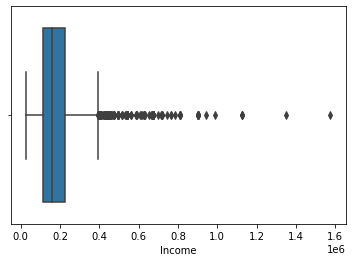

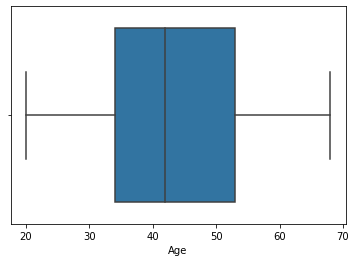

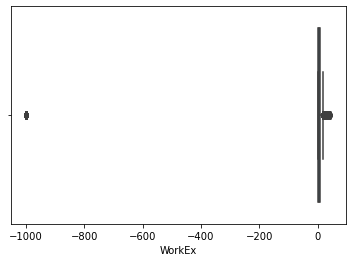

In [59]:
#boxplot to understand these columns better
sns.boxplot(x=df1["Income"])
plt.show()
sns.boxplot(x=df1["Age"])
plt.show()
sns.boxplot(x=df1["WorkEx"])
plt.show()

In [60]:
df1['WorkEx']=np.where(df1['WorkEx']<=0,0,df1['WorkEx'])  #converting negative values to zero

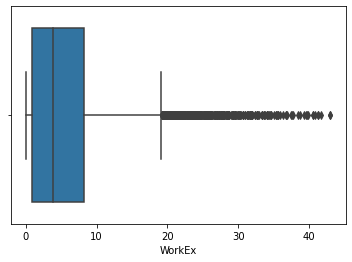

In [61]:
sns.boxplot(x=df1["WorkEx"])
plt.show()

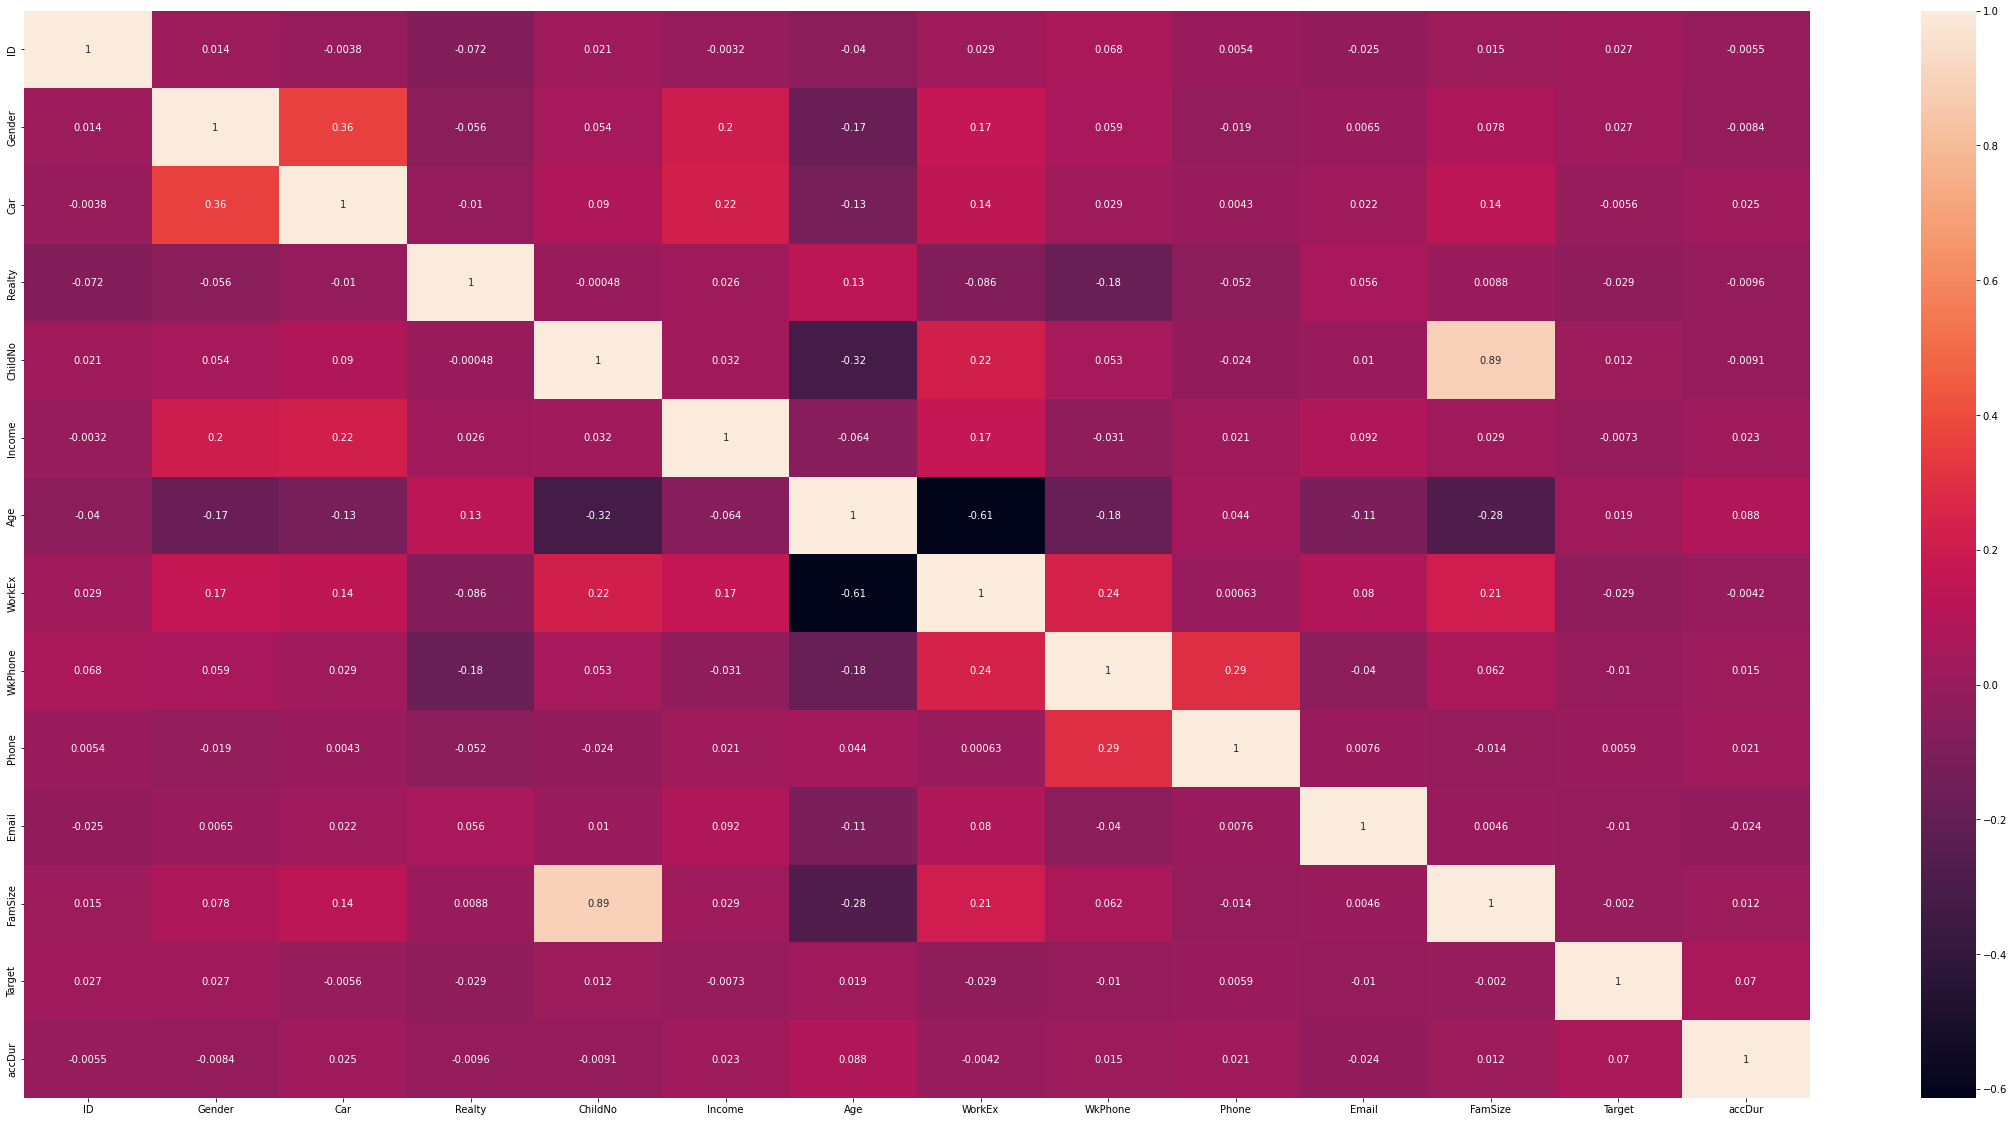

In [63]:
sns.heatmap(df.corr(),annot=True)
plt.rcParams['figure.figsize'] = [40, 20]

In [64]:
df1.drop(columns='ChildNo',inplace=True,axis=1) #as there is very high correlation between ChildNo and FamSize columns so i will drop one of them.

In [65]:
#shifting Target column to the end to get the final cleaned dataset for ML model
temp_cols=df1.columns.tolist()
index=df1.columns.get_loc("Target")
new_cols=temp_cols[0:index] + temp_cols[index+1:]+ temp_cols[index:index+1]
df1=df1[new_cols]
df1.head(1)

,Gender,Car,Realty,Income,Age,WorkEx,WkPhone,Phone,Email,FamSize,...,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,hightecwk,officewk,unknown,Target
0,1,1,1,427500.0,32,12.4,1,0,0,2.0,...,0,0,0,0,1,0,0,0,1,0


# EDA

In [66]:
df1.shape

(9709, 32)

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9709 entries, 0 to 9708
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gender                         9709 non-null   int64  
 1   Car                            9709 non-null   int64  
 2   Realty                         9709 non-null   int64  
 3   Income                         9709 non-null   float64
 4   Age                            9709 non-null   int64  
 5   WorkEx                         9709 non-null   float64
 6   WkPhone                        9709 non-null   int64  
 7   Phone                          9709 non-null   int64  
 8   Email                          9709 non-null   int64  
 9   FamSize                        9709 non-null   float64
 10  accDur                         9709 non-null   int64  
 11  Pensioner                      9709 non-null   uint8  
 12  State servant                  9709 non-null   u

In [68]:
df1.describe()

,Gender,Car,Realty,Income,Age,WorkEx,WkPhone,Phone,Email,FamSize,...,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,hightecwk,officewk,unknown,Target
count,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,...,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000
mean,0.348749,0.367700,0.671542,1.812282e+05,43.309198,5.668390,0.217427,0.287671,0.087548,2.182614,...,0.042229,0.894428,0.033268,0.007828,0.014832,0.046143,0.119168,0.267484,0.308374,0.021217
std,0.476599,0.482204,0.469677,9.927731e+04,11.635746,6.346329,0.412517,0.452700,0.282650,0.932918,...,0.201121,0.307305,0.179345,0.088132,0.120885,0.209805,0.324003,0.442670,0.461846,0.144116
min,0.000000,0.000000,0.000000,2.700000e+04,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.125000e+05,34.000000,0.900000,0.000000,0.000000,0.000000,2.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.575000e+05,42.000000,3.800000,0.000000,0.000000,0.000000,2.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,2.250000e+05,53.000000,8.200000,0.000000,1.000000,0.000000,3.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.575000e+06,68.000000,43.000000,1.000000,1.000000,1.000000,20.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='Target', ylabel='count'>

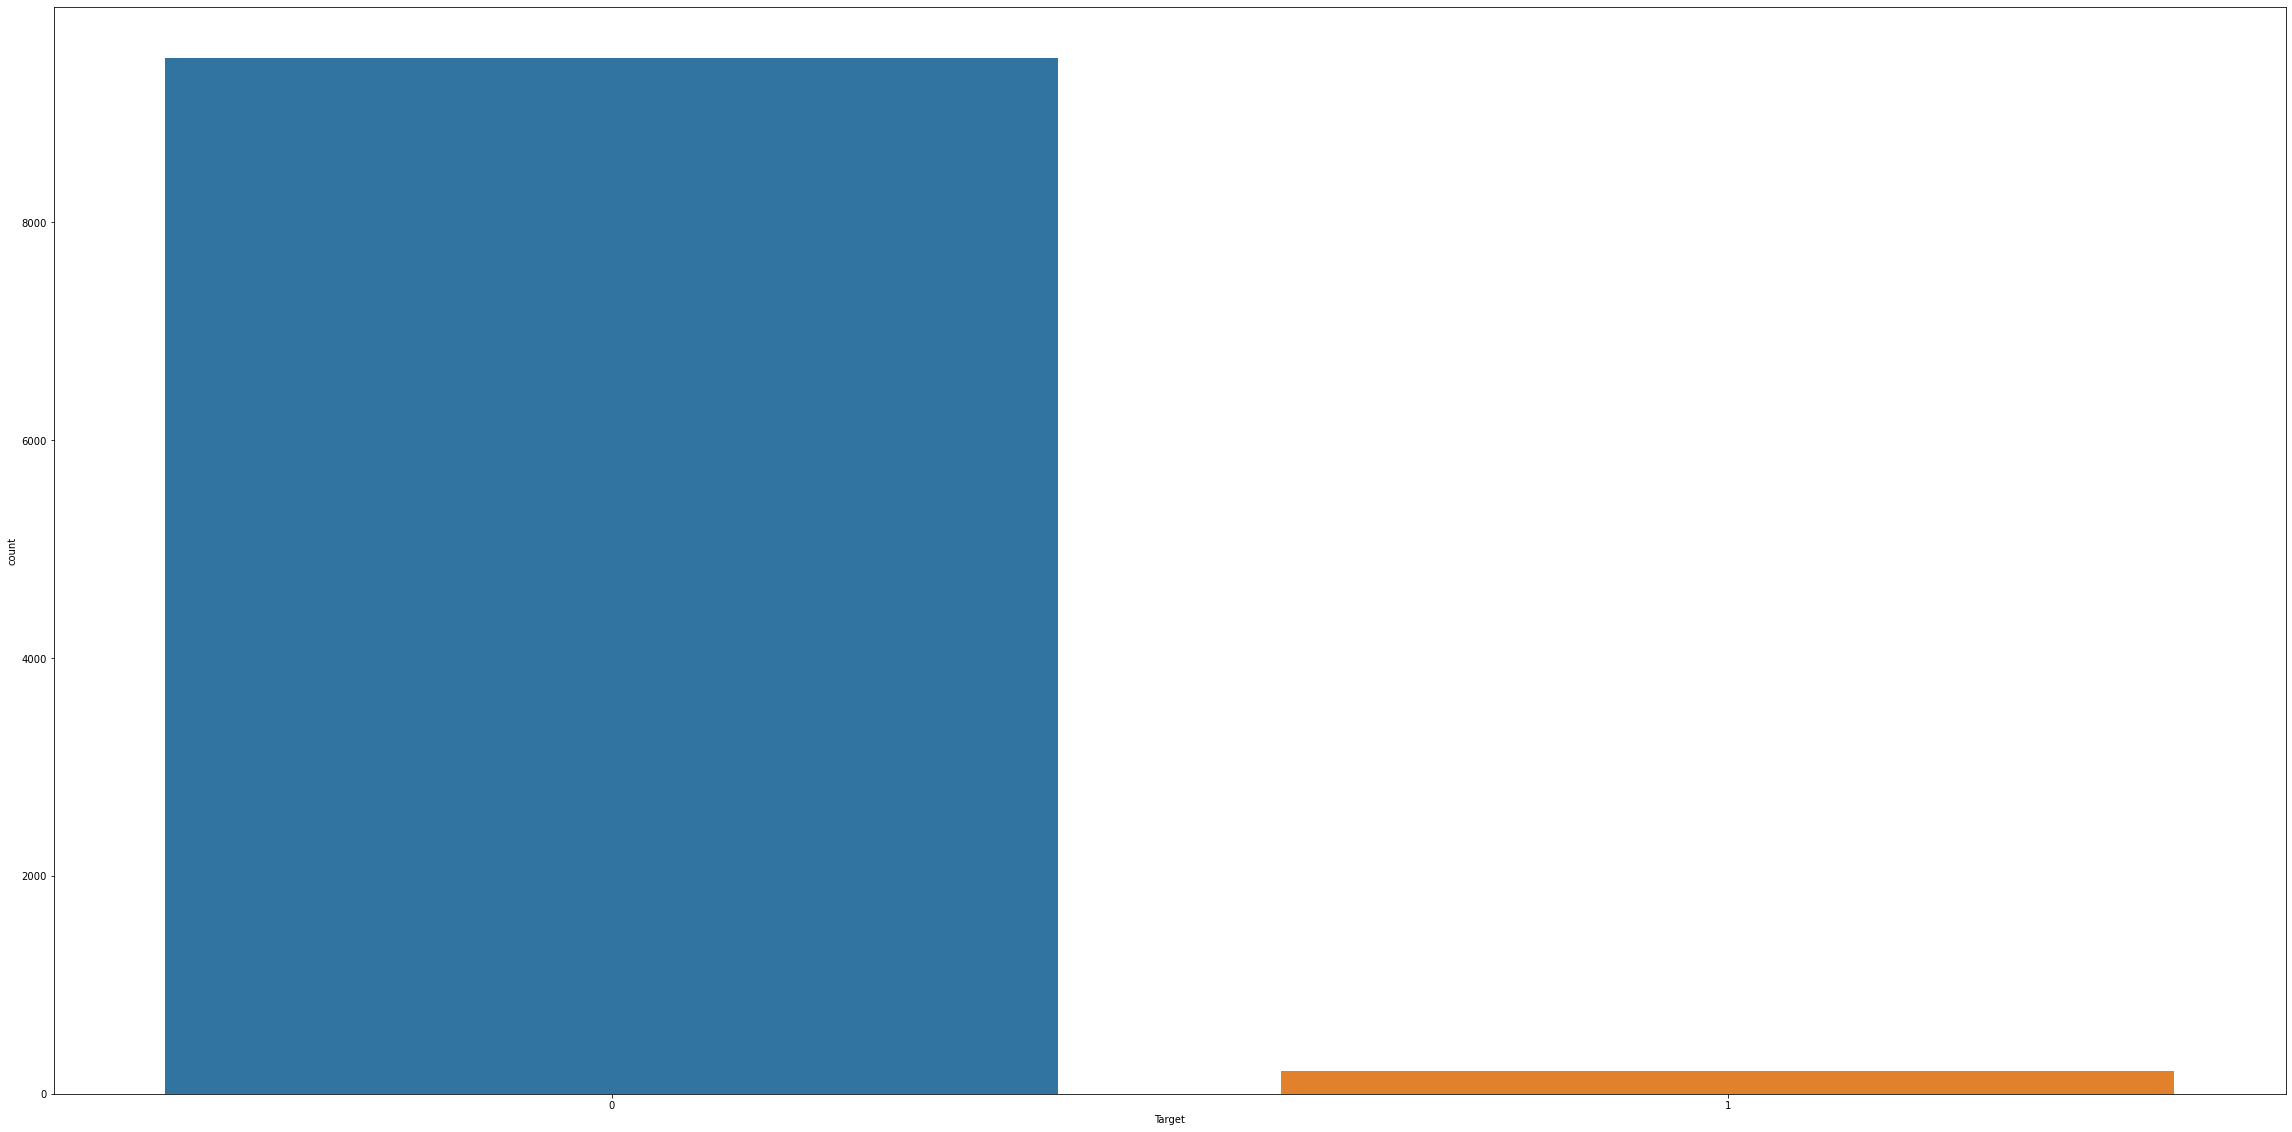

In [69]:
sns.countplot(x=df1['Target'])

<AxesSubplot:ylabel='Target'>

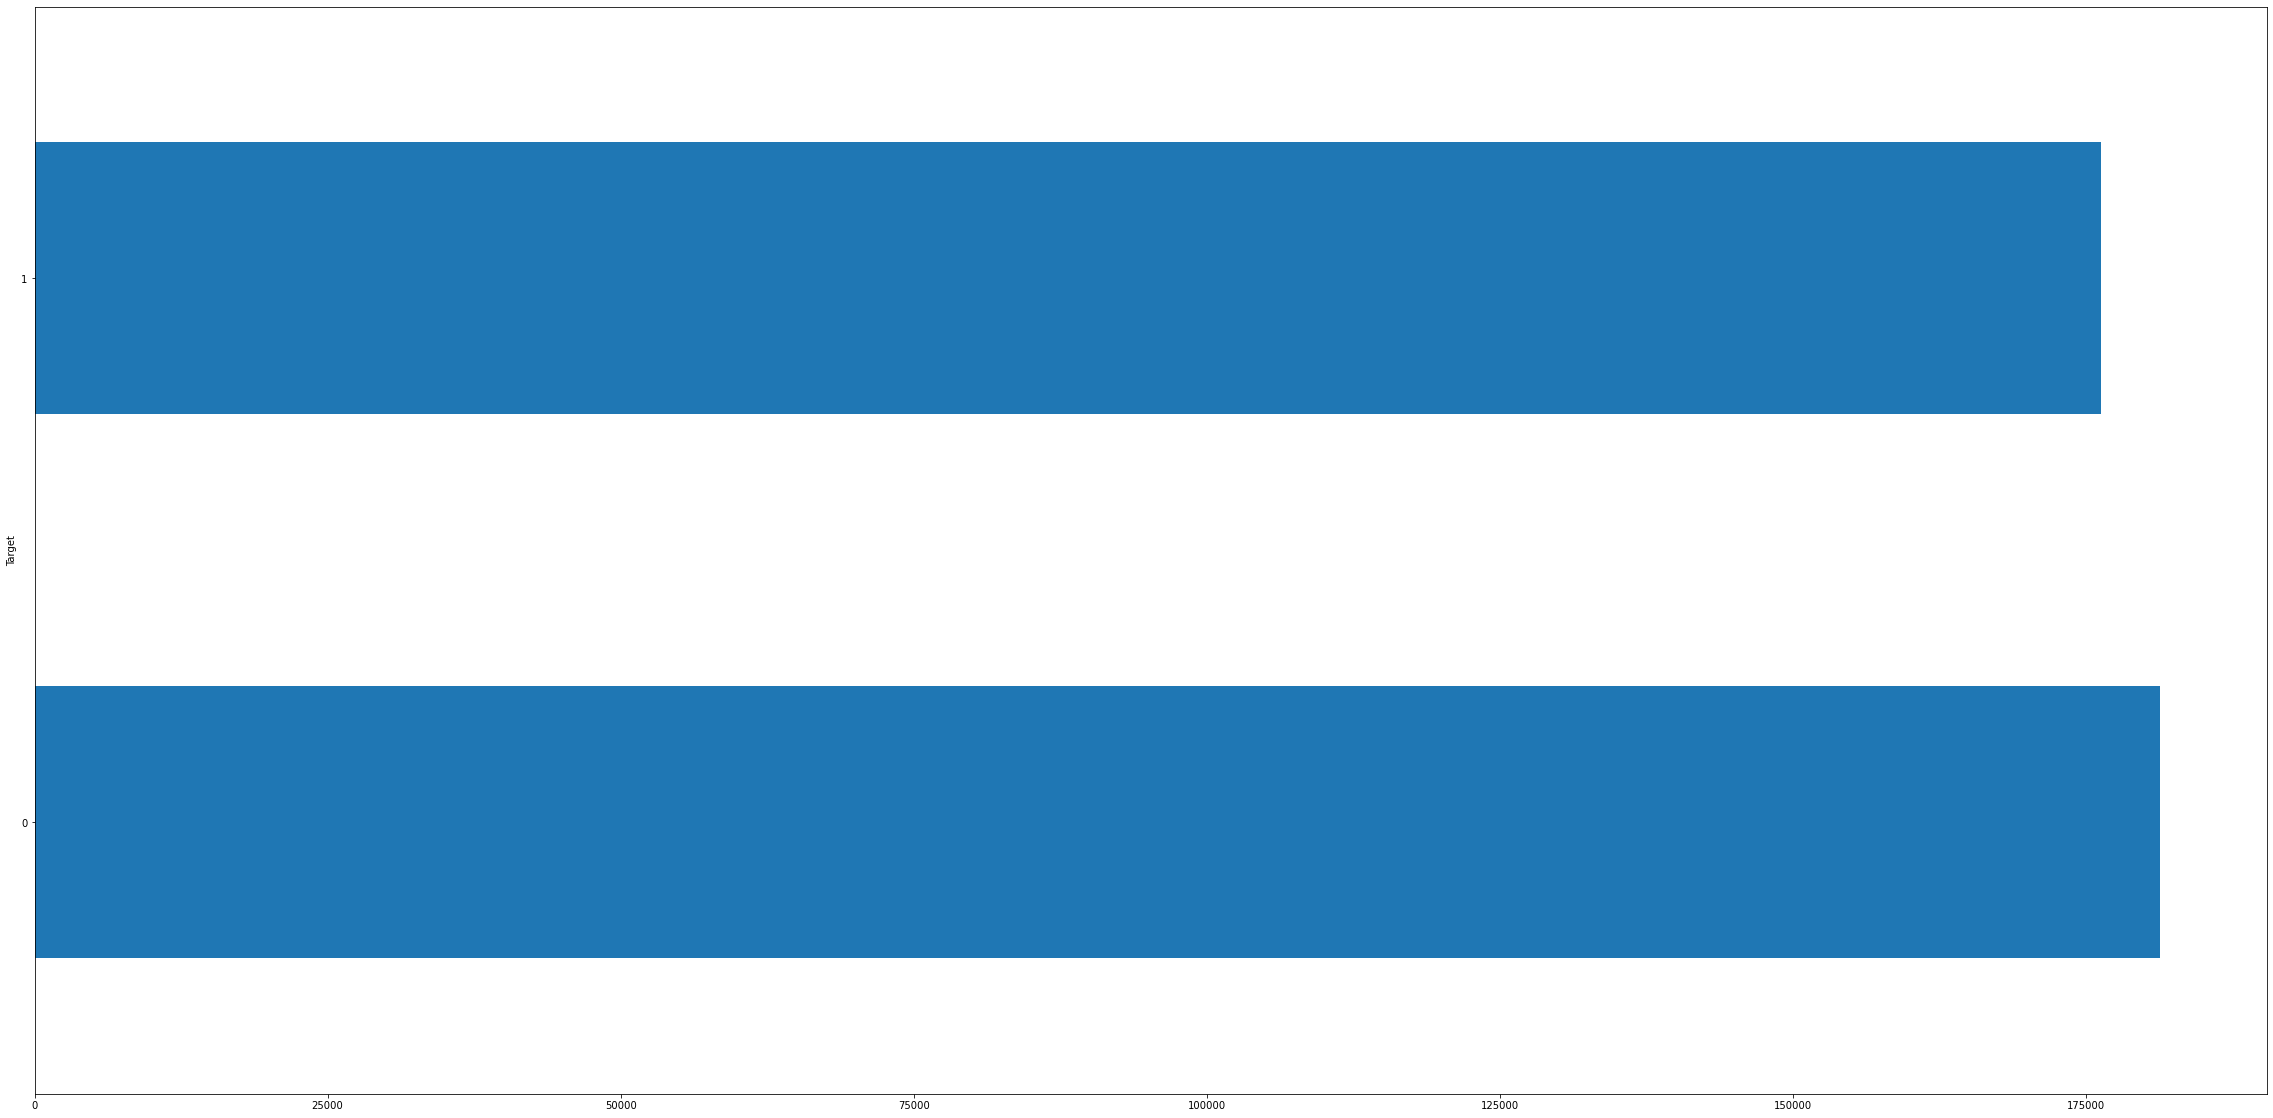

In [70]:
df1.groupby('Target').Income.mean().round(1).plot.barh()

<AxesSubplot:ylabel='Target'>

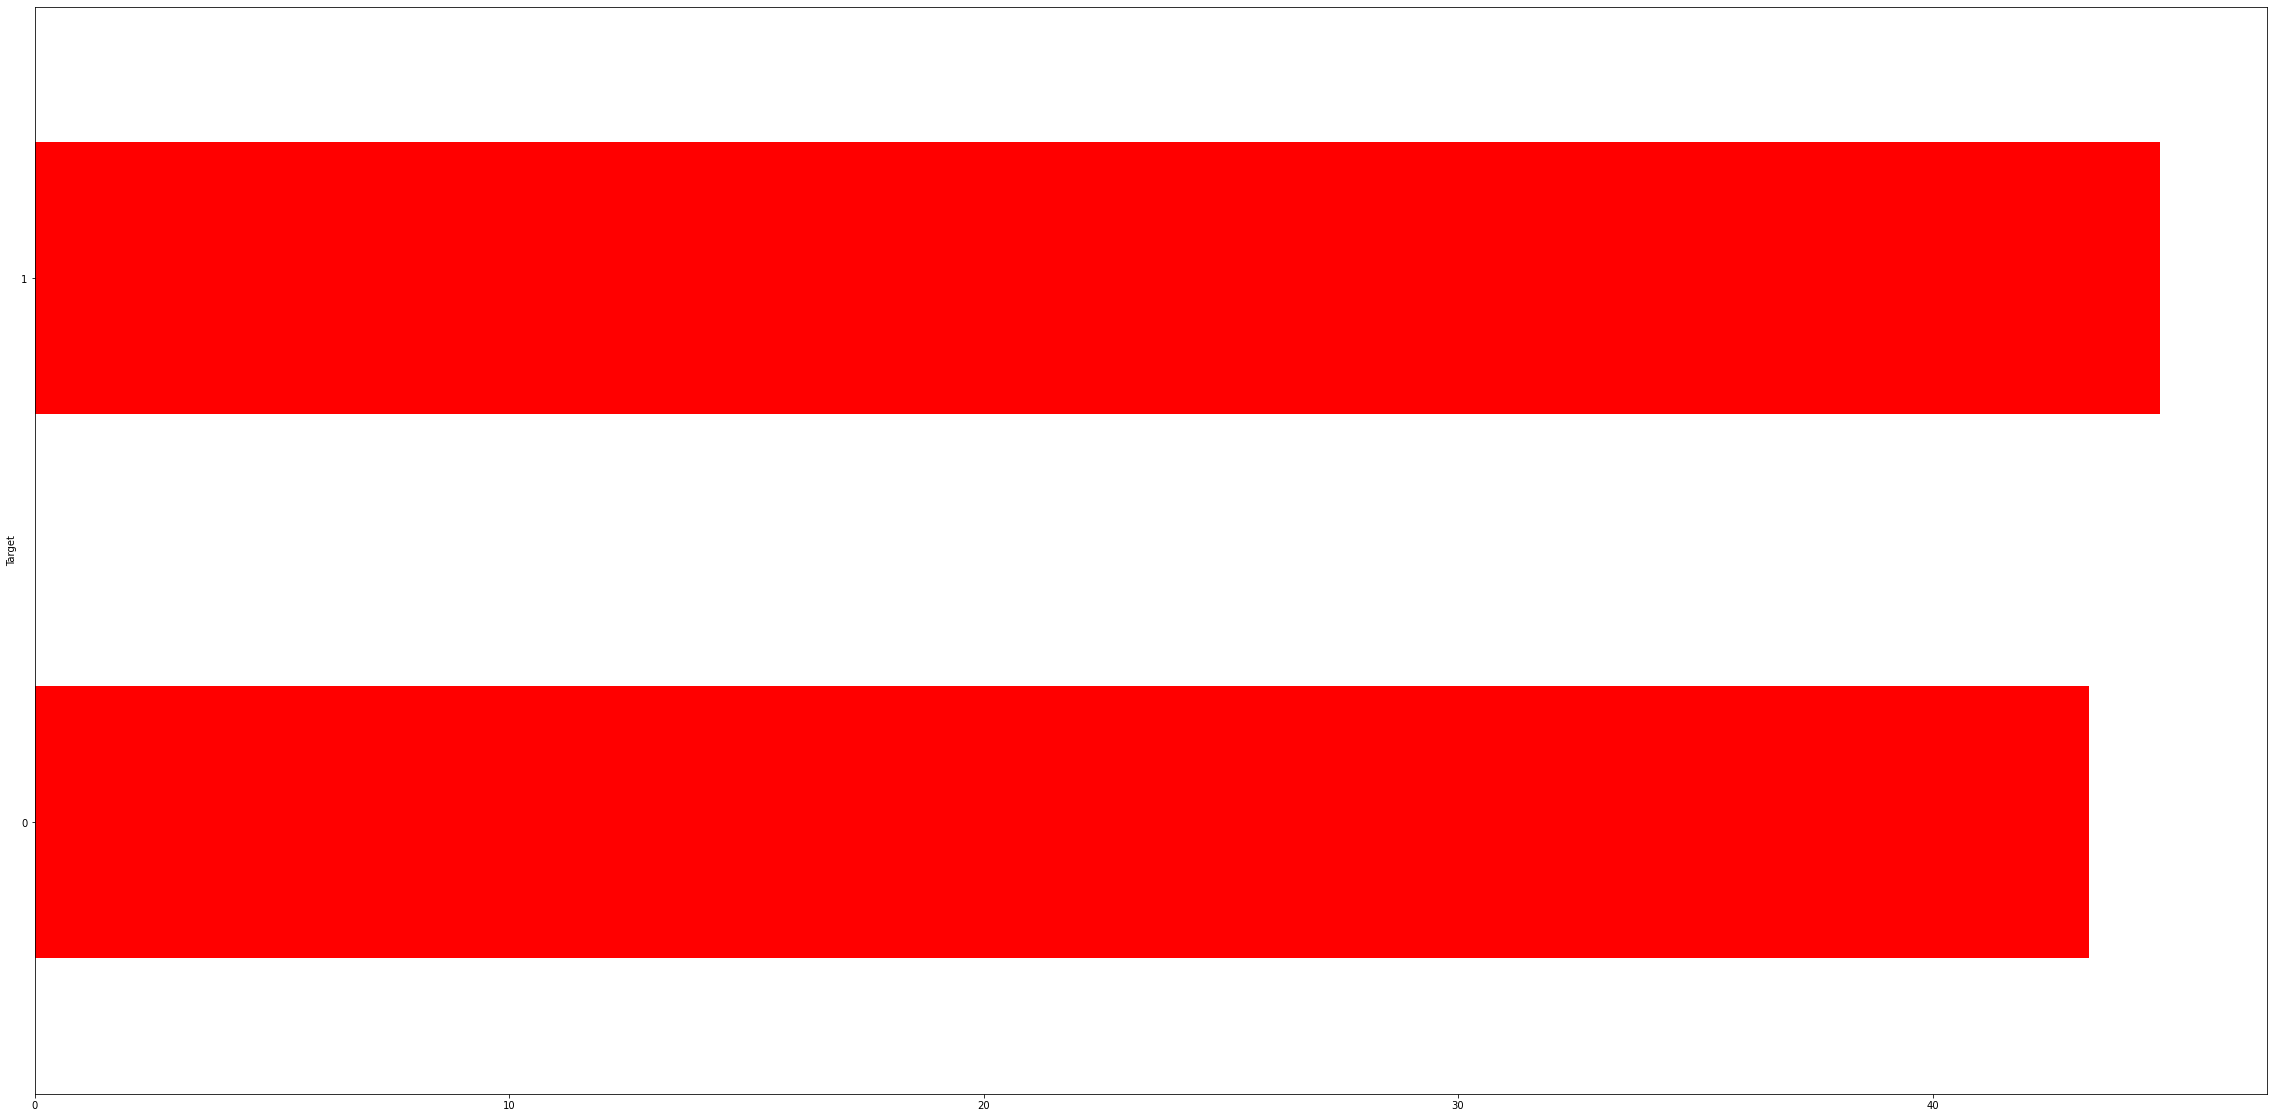

In [71]:
df1.groupby('Target').Age.mean().round(1).plot.barh(color='red')

In [72]:
df.groupby('Occupatn').Target.value_counts()

Occupatn   Target
Laborwk    0         2901
           1           60
hightecwk  0         1135
           1           22
officewk   0         2547
           1           50
unknown    0         2920
           1           74
Name: Target, dtype: int64

In [73]:
df1['Target'].value_counts()

0    9503
1     206
Name: Target, dtype: int64

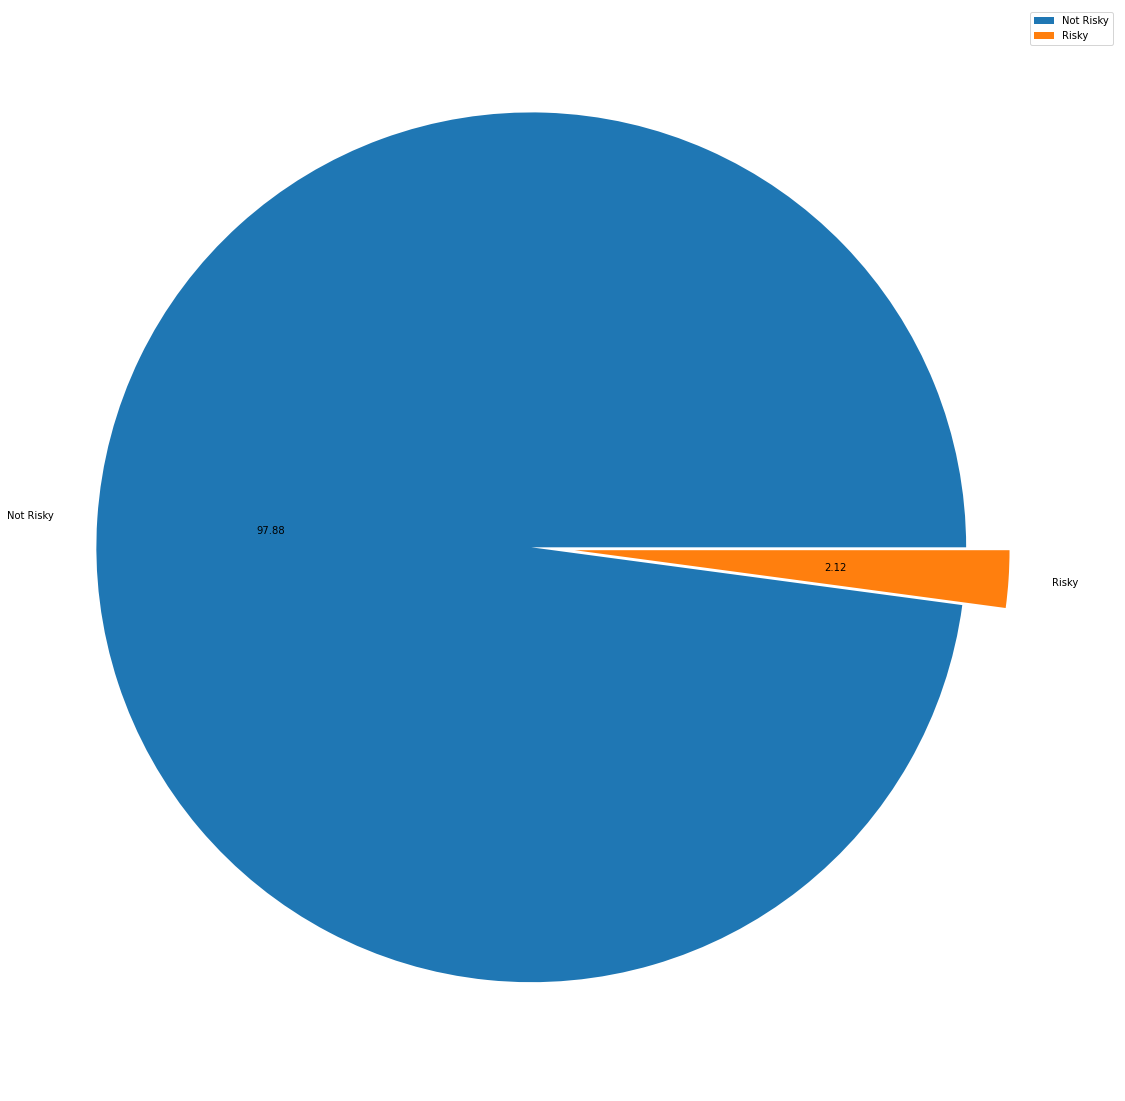

In [74]:
# 2.12% of the accounts are risky and 97.88% is not risky so to create the model we will have to apply oversampling on the risky 
myexplode = [0.1, 0]
mylabels = ["Not Risky","Risky"]
plt.pie(df1['Target'].value_counts(),labels=mylabels,autopct='%.2f',explode = myexplode)
plt.rcParams['figure.figsize'] = (10,10)
plt.legend()
plt.show()

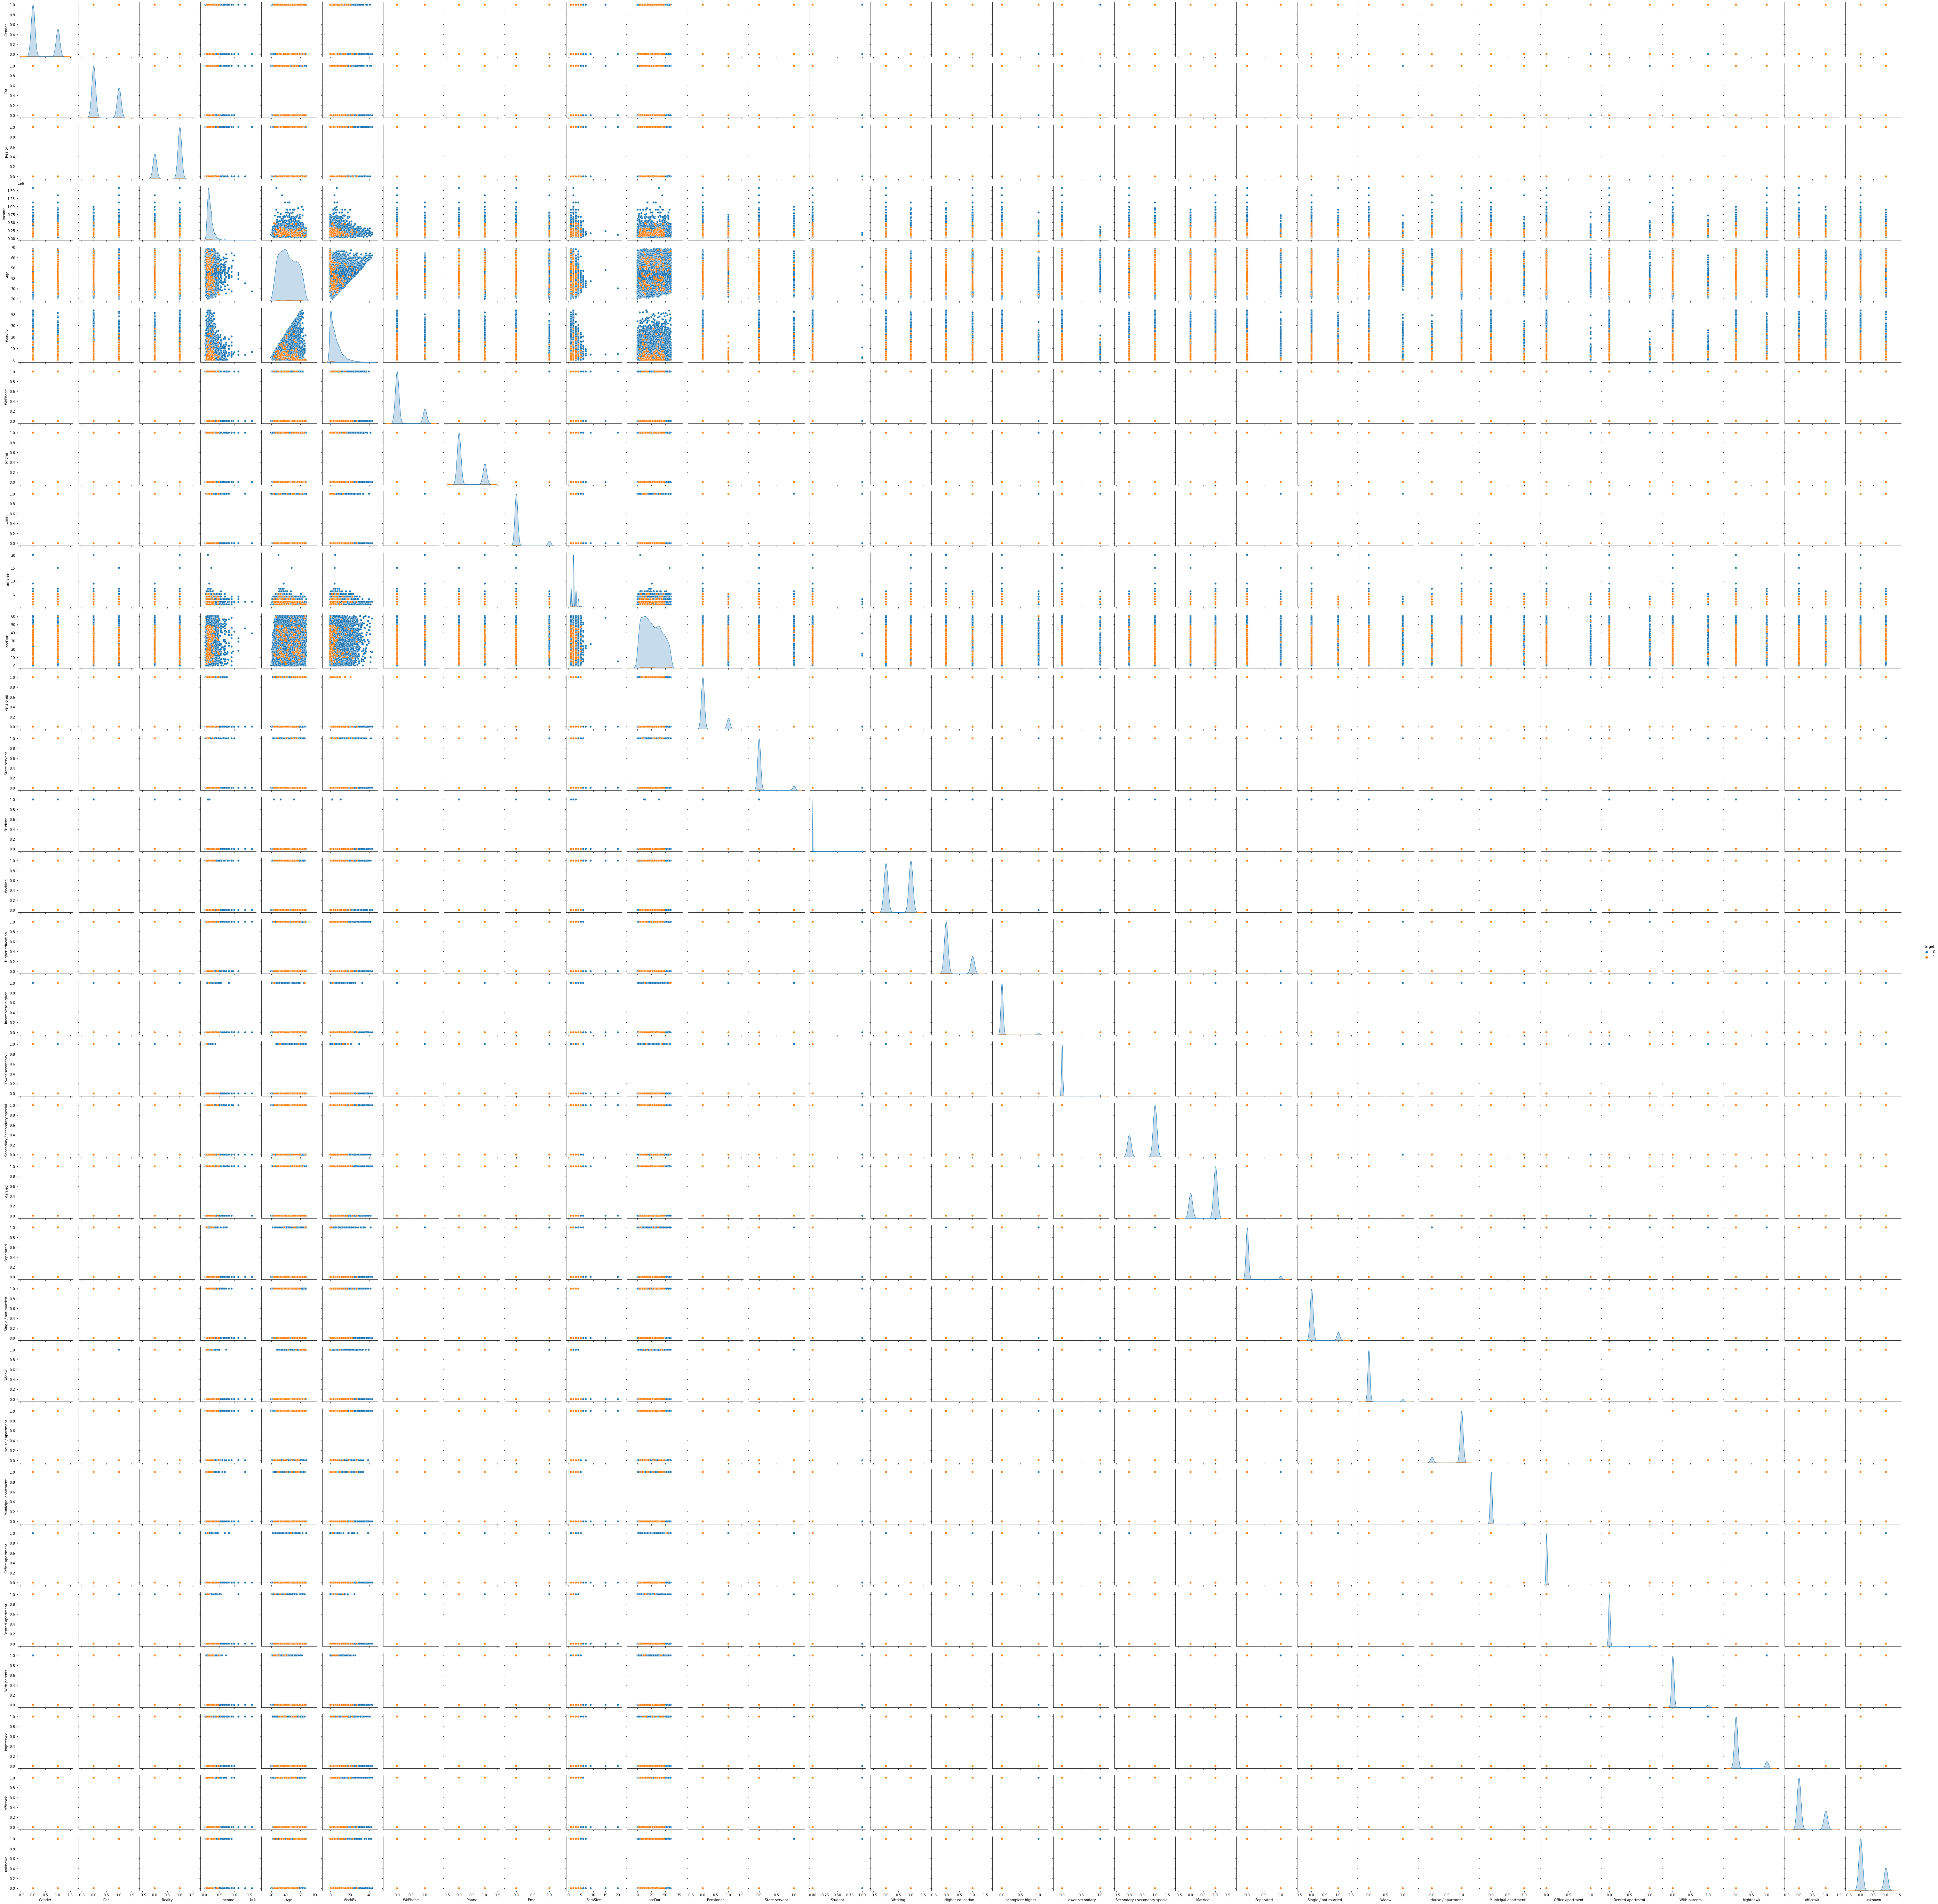

In [180]:
sns.pairplot(df1,hue='Target') #no multicollinearity found

# Creating the ML model

In [75]:
#defining input x and target y data
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]      

In [76]:
y.value_counts()

0    9503
1     206
Name: Target, dtype: int64

In [77]:
from imblearn.over_sampling import SMOTE    

In [78]:
#using SMOTE for oversampling
xres,yres = SMOTE().fit_resample(x,y)

In [79]:
yres.value_counts()

0    9503
1    9503
Name: Target, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
#splitting data into train and test
xtrain,xtest,ytrain,ytest=train_test_split(xres,yres,stratify=yres,test_size=0.25,random_state=0)

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
#scaling the data
scaler=StandardScaler()

In [84]:
scaler.fit(xtrain)

StandardScaler()

In [85]:
xtrainscaled=scaler.transform(xtrain)
xtestscaled=scaler.transform(xtest)

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [87]:
Models=[]

Models.append(("lgrg",LogisticRegression()))
Models.append(("DT",DecisionTreeClassifier()))
Models.append(("svm",SVC()))
Models.append(("knn",KNeighborsClassifier()))
Models.append(("bc",BaggingClassifier()))
Models.append(("Ada",AdaBoostClassifier()))
Models.append(("GB",GradientBoostingClassifier()))
Models.append(("xgb",XGBClassifier()))

In [88]:
len(Models)

8

In [89]:
for name,model in Models:
    model.fit(xtrainscaled,ytrain)
    ypred=model.predict(xtestscaled)
    ac=accuracy_score(ytest,ypred)
    train=model.score(xtrainscaled,ytrain)
    test=model.score(xtestscaled,ytest)
    print(name,ac)
    print(train,test)

lgrg 0.8920454545454546
0.8939946681633226 0.8920454545454546
DT 0.9579124579124579
1.0 0.9579124579124579
svm 0.9381313131313131
0.9462606987512278 0.9381313131313131
knn 0.952020202020202
0.9693419391048127 0.952020202020202
bc 0.9783249158249159
0.9986670408306441 0.9783249158249159
Ada 0.9105639730639731
0.913357653991862 0.9105639730639731
GB 0.9425505050505051
0.947874280903606 0.9425505050505051
xgb 0.9848484848484849
0.9972639259155325 0.9848484848484849


As XGBClassifier is giving the best results we will continue with it and tune it to get a better output.

In [91]:
#using XGBoost classifier to classify the data
mod=XGBClassifier()
mod.fit(xtrainscaled,ytrain)
ypred=mod.predict(xtestscaled)
cm=confusion_matrix(ytest,ypred)
print(classification_report(ytest,ypred))
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2376
           1       0.99      0.98      0.98      2376

    accuracy                           0.98      4752
   macro avg       0.98      0.98      0.98      4752
weighted avg       0.98      0.98      0.98      4752

[[2344   32]
 [  40 2336]]


In [92]:
params2={
"learning_rate": [0.01,0.05,0.10,0.15,0.20,0.25,0.30 ], # The rate at which the XGBoost model learns during the training phase
"max_depth"        : [ 6,8,9,10,11,12],                 # This is the maximum depth of the XGBoost classifier.
"gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],      # This is used to reduce the loss when correcting model errors.
"reg_lambda":[1,3,5,7,9]                                # L2 regularisation term
    }

In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [94]:
from sklearn.model_selection import  cross_val_score

In [95]:
classifier=XGBClassifier()

In [96]:
#using RandomizedSearchCV to get the best parameters
random_search=RandomizedSearchCV(classifier,param_distributions=params2,n_iter=20,scoring='accuracy',n_jobs=-1,cv=2)

In [97]:
random_search.fit(xres,yres)

RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                   

In [98]:
random_search.best_params_

{'reg_lambda': 3, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.2}

In [112]:
#applying the parameters into the model
mod1=XGBClassifier(max_depth= 10,
 learning_rate= 0.2,
  reg_lambda=5,
 gamma=0.2)
mod1.fit(xtrainscaled,ytrain)
ypred=mod1.predict(xtestscaled)
train=mod1.score(xtrainscaled,ytrain)*100
test=mod1.score(xtestscaled,ytest)*100
cm=confusion_matrix(ytest,ypred)
print(train,test)
print(classification_report(ytest,ypred))
print(cm)

99.83864178476217 98.67424242424242
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2376
           1       0.99      0.98      0.99      2376

    accuracy                           0.99      4752
   macro avg       0.99      0.99      0.99      4752
weighted avg       0.99      0.99      0.99      4752

[[2351   25]
 [  38 2338]]


After tuning we can see that the Type 1 error decrease from 32 to 25 and type 2 error decrease from 40 to 38

In [113]:
#getting the mean cross_val_score for the model
cvs = cross_val_score(mod1, xres,yres, cv=5, scoring="accuracy")
print(cvs)
print(cvs.mean()*100)

[0.95607575 0.99579058 0.99447514 0.99500132 0.99552749]
98.7374055472265


In [114]:
#getting the mean cross_val_score for the model
cvs = cross_val_score(mod1, x,y, cv=5, scoring="accuracy")
print(cvs)
print(cvs.mean()*100)

[0.97785788 0.97888774 0.98094748 0.97888774 0.98042246]
97.94006614276671


In [115]:
thresholds = mod1.feature_importances_
thresholds

array([0.00968645, 0.03535455, 0.04695592, 0.00903028, 0.00675829,
       0.00604425, 0.07694785, 0.0160821 , 0.02328257, 0.05019103,
       0.00842851, 0.00541116, 0.04826923, 0.        , 0.024966  ,
       0.04562794, 0.04225778, 0.03461   , 0.02256613, 0.1272882 ,
       0.0695952 , 0.04667879, 0.06772593, 0.00976601, 0.01963389,
       0.01703751, 0.02729891, 0.01858105, 0.02571177, 0.03612691,
       0.02208576], dtype=float32)

In [116]:
print(df1.columns.values.tolist()[13])

Student


In [117]:
df000=df1[df1['Target']==1]

In [118]:
df000.sample(1).values

array([[0.0e+00, 0.0e+00, 0.0e+00, 8.1e+04, 6.5e+01, 0.0e+00, 0.0e+00,
        1.0e+00, 0.0e+00, 1.0e+00, 4.9e+01, 1.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 1.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 1.0e+00, 1.0e+00]])

In [119]:
xtrainscaled=scaler.transform([[0.0e+00, 0.0e+00, 0.0e+00, 8.1e+04, 6.5e+01, 0.0e+00, 0.0e+00,
        1.0e+00, 0.0e+00, 1.0e+00, 4.9e+01, 1.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 1.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 1.0e+00]])

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [120]:
mod1.predict(xtrainscaled)

array([1])

In [121]:
df001=df1[df1['Target']==0]

In [122]:
df001.sample(1).values

array([[0.000e+00, 1.000e+00, 1.000e+00, 2.025e+05, 2.600e+01, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.200e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00]])

In [123]:
xtrainscaled=scaler.transform([[0.000e+00, 1.000e+00, 1.000e+00, 2.025e+05, 2.600e+01, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.200e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00]])

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [124]:
mod1.predict(xtrainscaled)

array([0])